In [1]:
!pip install datasets

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="huggingface_hub.utils._auth")

In [3]:
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = load_dataset("nlplabtdtu/xlsum_en")

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'text', 'target'],
        num_rows: 306521
    })
    validation: Dataset({
        features: ['title', 'text', 'target'],
        num_rows: 11535
    })
    test: Dataset({
        features: ['title', 'text', 'target'],
        num_rows: 11535
    })
})


In [6]:
df_train = pd.DataFrame(dataset['train'])
df_val = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

In [7]:
df_train.columns

Index(['title', 'text', 'target'], dtype='object')

In [8]:
df_train.head()

,title,text,target
0,Weather alert issued for gale force winds in W...,Help me summarize this article: The Met Office...,Winds could reach gale force in Wales with sto...
1,Huge tidal turbine installed at Orkney test site,Summarize this: Atlantis Resources unveiled th...,The massive tidal turbine AK1000 has been inst...
2,Leeds stabbing: Man attacked outside betting shop,Police were called to the scene outside the Co...,A man has been stabbed in broad daylight outsi...
3,Could killing of Iranian general help Trump ge...,Anthony ZurcherNorth America reporter@awzurche...,It was inevitable that the fallout from the US...
4,Coronavirus: Ive moved out to protect my famil...,Help me summarize this article: By Debbie Jack...,Week four of social distancing is starting to ...


In [9]:
df_train['title'][0]

'Weather alert issued for gale force winds in Wales'

In [10]:
df_train['text'][0]

'Help me summarize this article: The Met Office has issued a yellow weather warning for wind covering Wales and England, starting from 21:00 GMT on Wednesday evening. Travel and power are both likely to be disrupted, with the warning to remain in place until 15:00 on Thursday. Gusts of 55mph (88kmh) are likely and could hit up to 70mph on coasts and hills, with heavy and blustery showers. '

In [11]:
df_train['target'][0]

'Winds could reach gale force in Wales with stormy weather set to hit the whole of the country this week.'

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306521 entries, 0 to 306520
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   306521 non-null  object
 1   text    306521 non-null  object
 2   target  306521 non-null  object
dtypes: object(3)
memory usage: 7.0+ MB


In [13]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11535 entries, 0 to 11534
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   11535 non-null  object
 1   text    11535 non-null  object
 2   target  11535 non-null  object
dtypes: object(3)
memory usage: 270.5+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11535 entries, 0 to 11534
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   11535 non-null  object
 1   text    11535 non-null  object
 2   target  11535 non-null  object
dtypes: object(3)
memory usage: 270.5+ KB


In [15]:
df = pd.concat([df_train, df_val, df_test], ignore_index=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329591 entries, 0 to 329590
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   329591 non-null  object
 1   text    329591 non-null  object
 2   target  329591 non-null  object
dtypes: object(3)
memory usage: 7.5+ MB


In [17]:
df.isnull().sum()

,0
title,0
text,0
target,0


In [18]:
df['article_len'] = df['text'].apply(lambda x: len(x.split()))
df['summary_len'] = df['target'].apply(lambda x: len(x.split()))

In [19]:
df.head()

,title,text,target,article_len,summary_len
0,Weather alert issued for gale force winds in W...,Help me summarize this article: The Met Office...,Winds could reach gale force in Wales with sto...,68,20
1,Huge tidal turbine installed at Orkney test site,Summarize this: Atlantis Resources unveiled th...,The massive tidal turbine AK1000 has been inst...,63,19
2,Leeds stabbing: Man attacked outside betting shop,Police were called to the scene outside the Co...,A man has been stabbed in broad daylight outsi...,63,14
3,Could killing of Iranian general help Trump ge...,Anthony ZurcherNorth America reporter@awzurche...,It was inevitable that the fallout from the US...,339,37
4,Coronavirus: Ive moved out to protect my famil...,Help me summarize this article: By Debbie Jack...,Week four of social distancing is starting to ...,386,11


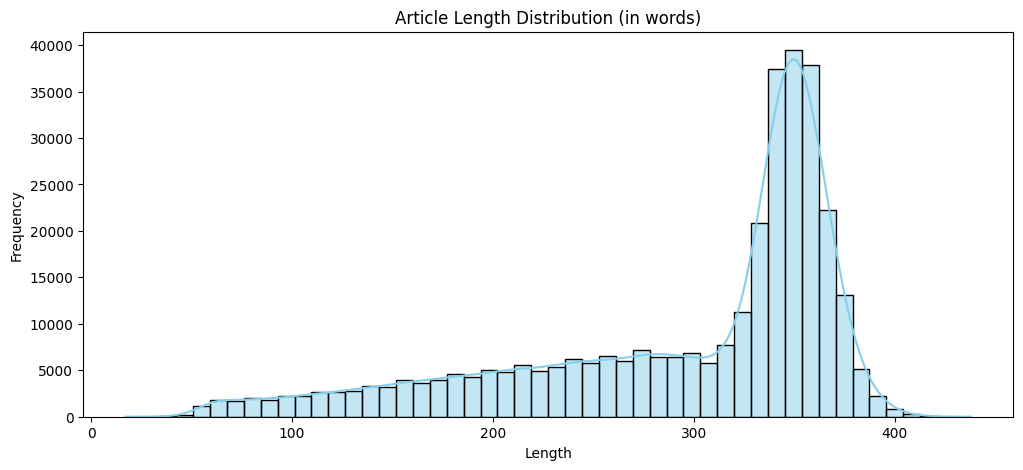

In [20]:
plt.figure(figsize=(12,5))
sns.histplot(df['article_len'], bins=50, kde=True, color='skyblue')
plt.title("Article Length Distribution (in words)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

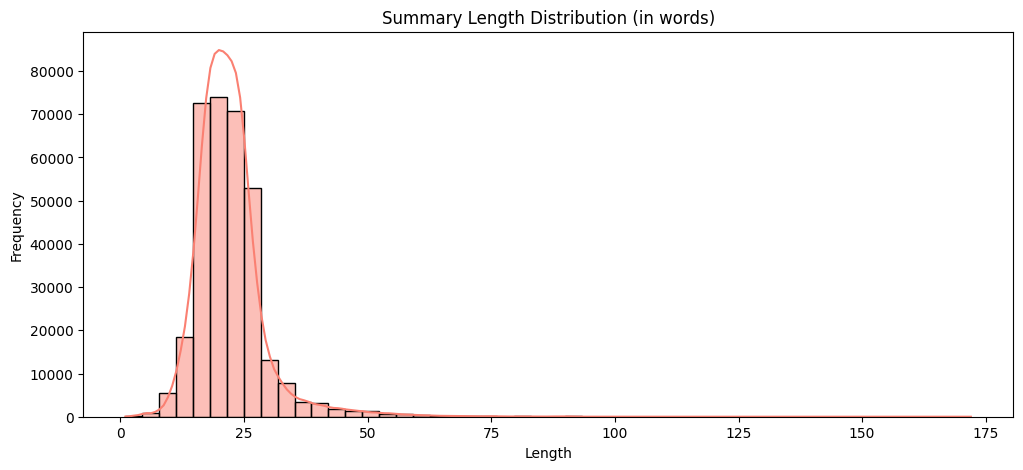

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(df['summary_len'], bins=50, kde=True, color='salmon')
plt.title("Summary Length Distribution (in words)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [22]:
df["compression_ratio"] = df["summary_len"] / df["article_len"]

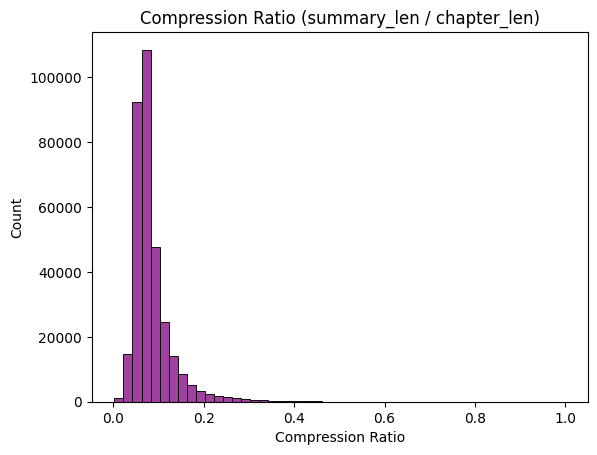

In [23]:
sns.histplot(df["compression_ratio"], bins=50, color="purple")
plt.title("Compression Ratio (summary_len / chapter_len)")
plt.xlabel("Compression Ratio")
plt.show()

In [24]:
from wordcloud import WordCloud

summary_text = " ".join(df["target"].tolist())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(summary_text)

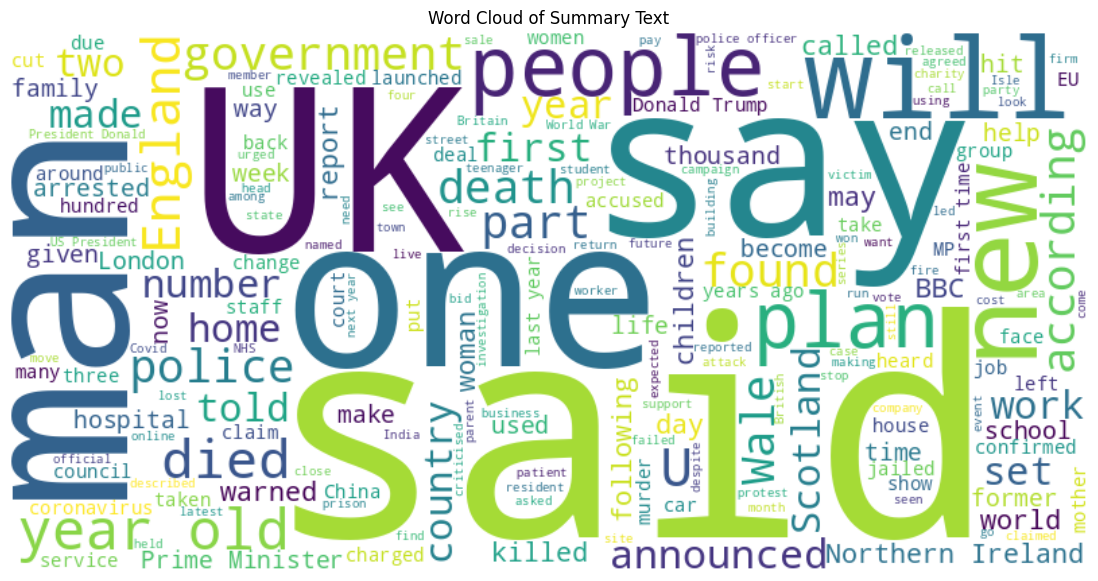

In [25]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Summary Text")
plt.show()

In [26]:
max_article_len = df["article_len"].max()
min_article_len = df["article_len"].min()

print("Max Article Length:", max_article_len)
print("Min Article Length:", min_article_len)

Max Article Length: 438
Min Article Length: 17


In [27]:
max_summary_len = df["summary_len"].max()
min_summary_len = df["summary_len"].min()

print("Max Summary Length:", max_summary_len)
print("Min Summary Length:", min_summary_len)

Max Summary Length: 172
Min Summary Length: 1


In [28]:
print(df.duplicated().sum())

0


In [29]:
df[['article_len', 'summary_len']].describe()

,article_len,summary_len
count,329591.00000,329591.000000
mean,295.00601,22.066355
std,81.37825,7.157783
min,17.00000,1.000000
25%,247.00000,18.000000
50%,335.00000,21.000000
75%,353.00000,25.000000
max,438.00000,172.000000


<Axes: xlabel='article_len', ylabel='Count'>

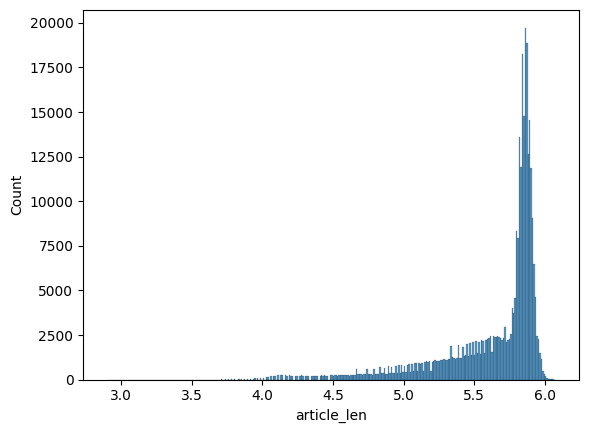

In [30]:
sns.histplot(np.log1p(df['article_len']))

<Axes: xlabel='article_len', ylabel='summary_len'>

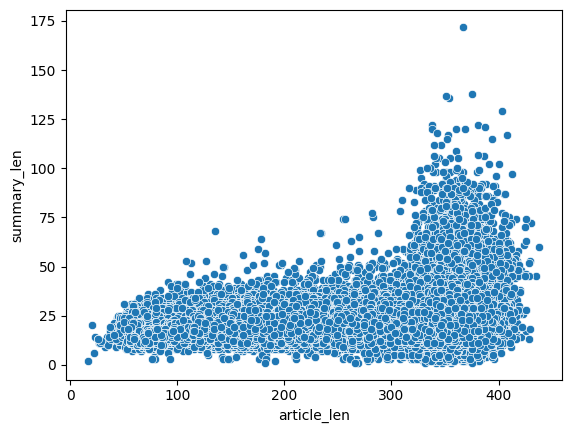

In [31]:
sns.scatterplot(x='article_len', y='summary_len', data=df)

In [32]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
stop_words = set(stopwords.words("english"))
words = " ".join(df["target"]).split()
filtered = [w for w in words if w.lower() not in stop_words]

In [34]:
Counter(filtered).most_common(20)

[('new', 23258),
 ('people', 18514),
 ('-', 16211),
 ('said.', 15813),
 ('man', 14909),
 ('UK', 14318),
 ('first', 13984),
 ('US', 13724),
 ('said', 13239),
 ('government', 12343),
 ('years', 12210),
 ('could', 11956),
 ('police', 11909),
 ('two', 11343),
 ('one', 11238),
 ('Wales', 9410),
 ('says', 9392),
 ('died', 8935),
 ('according', 8607),
 ('found', 7939)]

In [35]:
filtered_df = df[['text', 'target']]

In [36]:
filtered_df.columns = ['article', 'summary']

In [37]:
filtered_df.head()

,article,summary
0,Help me summarize this article: The Met Office...,Winds could reach gale force in Wales with sto...
1,Summarize this: Atlantis Resources unveiled th...,The massive tidal turbine AK1000 has been inst...
2,Police were called to the scene outside the Co...,A man has been stabbed in broad daylight outsi...
3,Anthony ZurcherNorth America reporter@awzurche...,It was inevitable that the fallout from the US...
4,Help me summarize this article: By Debbie Jack...,Week four of social distancing is starting to ...


In [38]:
filtered_df.to_csv('articles_and_summaries.csv', index=False)

In [39]:
filtered_df.to_json('articles_and_summaries.json', orient='records', lines=True)